In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict,  cross_val_score
# from google.colab import drive
# drive.mount('/content/drive')
train=pd.read_csv("/content/drive/MyDrive/DATASET/mnist_train.csv",sep=",")
test=pd.read_csv("/content/drive/MyDrive/DATASET/mnist_test.csv",sep=",")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/mnist_train.csv')
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATASET/mnist_test.csv')
df1

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
y_train = df["label"].copy().to_numpy()
X_train = df.drop(columns=["label"]).to_numpy()

print("The training digits data:\n", X_train)
print("Digit labels: ", y_train)

# Similarly for the test set
y_test = df1["label"].copy().to_numpy()
X_test = df1.drop(columns=["label"]).to_numpy()

The training digits data:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Digit labels:  [5 0 4 ... 5 6 8]


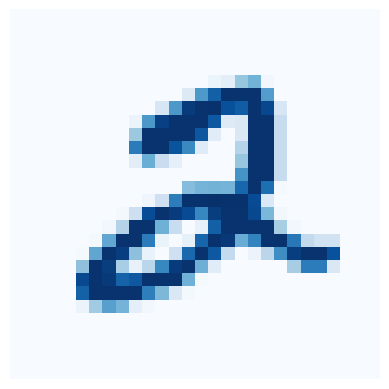

In [ ]:
some_digit_data = X_train[5]
some_digit_image = some_digit_data.reshape(28, 28)

# imshow plots the matrix
plt.imshow(some_digit_image, cmap=plt.cm.Blues)
plt.axis("off")
plt.show()

In [ ]:
print(y_train[5])

2


(2) Visualise Data

In [ ]:
def plot_digits(data, row_size=5):
    for i in range(len(data)):
        ax = plt.subplot(row_size, row_size, i+1)

        digit = data[i]
        digit_image = digit.reshape(28, 28)

        plt.imshow(digit_image, cmap=plt.cm.Blues)
        plt.axis("off")

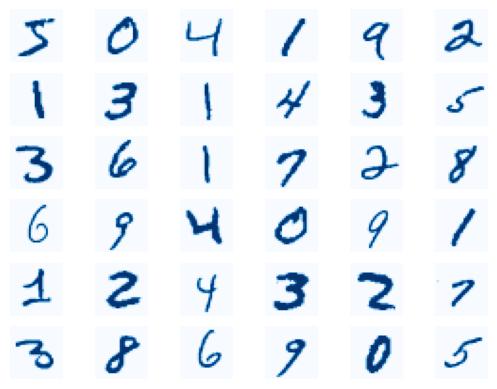

In [ ]:
plot_digits(X_train[:36], row_size=6)
plt.show()

11490434/11490434 [==============================] - 0s 0us/step


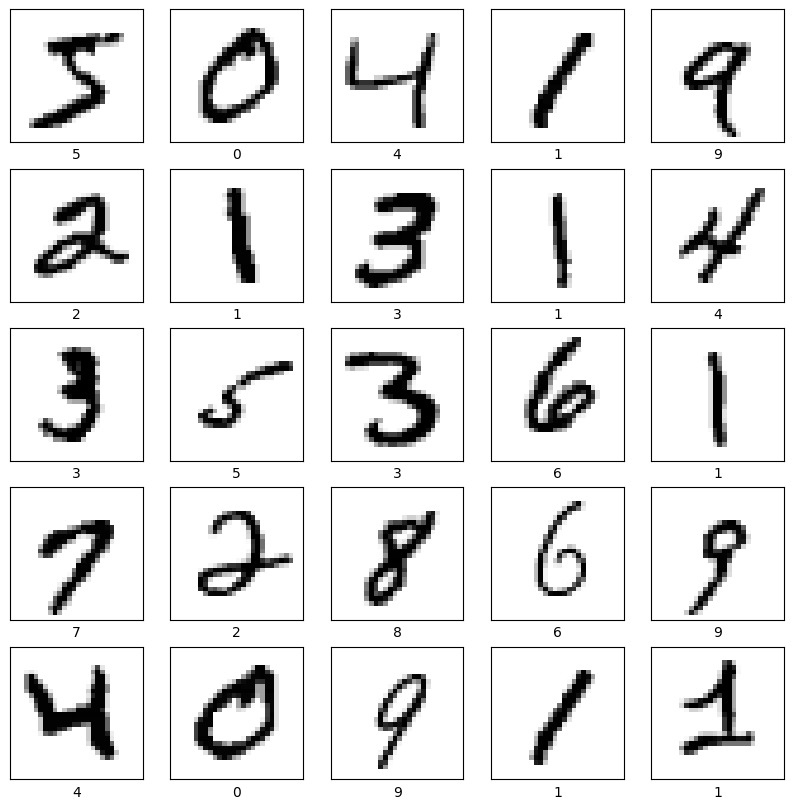

In [ ]:
from tensorflow.keras.datasets import mnist  # You can use TensorFlow/Keras to load MNIST

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Visualize the data
plt.figure(figsize=(10, 10))  # Set the figure size for the plots

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

plt.show()

In [ ]:
y_train = train["label"]
X_train = train.drop(columns=["label"])
y_test = test["label"]
X_test = test.drop(columns=["label"])

(3) check class imbalance

In [ ]:
# from sklearn.utils import class_distribution

ImportError: ignored

In [ ]:
train.label.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [ ]:
value_counts = train['label'].value_counts()
total_count = len(train)
percentages = (value_counts / total_count) * 100
result_df = pd.DataFrame({'Value Counts': value_counts, 'Percentages (%)': percentages})
result_df

,Value Counts,Percentages (%)
1,6742,11.236667
7,6265,10.441667
3,6131,10.218333
2,5958,9.930000
9,5949,9.915000
0,5923,9.871667
6,5918,9.863333
8,5851,9.751667
4,5842,9.736667
5,5421,9.035000


In [ ]:
test.label.value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: label, dtype: int64

In [ ]:
value_counts = test['label'].value_counts()
total_count = len(test)
percentages = (value_counts / total_count) * 100
result_dft = pd.DataFrame({'Value Counts': value_counts, 'Percentages (%)': percentages})
result_dft

,Value Counts,Percentages (%)
1,1135,11.35
2,1032,10.32
7,1028,10.28
3,1010,10.10
9,1009,10.09
4,982,9.82
0,980,9.80
8,974,9.74
6,958,9.58
5,892,8.92


Data set is bit Imbalanced

(4) Compare Leave one out , 2,3,5 and 10 cross validation folds




Declaring KNN as 5 (nearest neighbour)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)

KNeighborsClassifier()

For 2 folds accuracy

In [ ]:
CV_2 = cross_val_predict(KNN, X_train, y_train, cv=2)
CV_2

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
accuracies_2 = cross_val_score(KNN, X_train, y_train, cv=2, scoring='accuracy').mean()
accuracies_2

0.96365

For 3 folds accuracy

In [ ]:
CV_3= cross_val_predict(KNN, X_train, y_train, cv=3)
CV_3

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
accuracies = cross_val_score(KNN, X_train, y_train, cv=3, scoring='accuracy').mean()
accuracies

0.9674166666666667

For 5 folds accuracy

In [ ]:
CV_5 = cross_val_predict(KNN, X_train, y_train, cv=5)
CV_5

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
accuracies_5 = cross_val_score(KNN, X_train, y_train, cv=5, scoring='accuracy').mean()
accuracies_5

0.9692833333333335

For 10 folds accuracy

In [ ]:
CV_10 = cross_val_predict(KNN, X_train, y_train, cv=10)
CV_10

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
accuracies_10 = cross_val_score(KNN, X_train, y_train, cv=10, scoring='accuracy').mean()
accuracies_10

0.9700499999999999

For Leave one out Cross validation fold accuracy / Ideally Leave-One-Out Cross Validation should not be used here due to large amount of data (70000 X 785) the computational time is very high as it assumes each entry as one fold and compares to rest of entries.

In [ ]:
# from sklearn.model_selection import LeaveOneOut

# loo = LeaveOneOut()
# loo_scores = cross_val_score(KNN,X_train, y_train, cv=loo, scoring='accuracy')
# mean_loo_accuracy = loo_scores.mean()

(5)  Observe the pattern as the number of folds increases

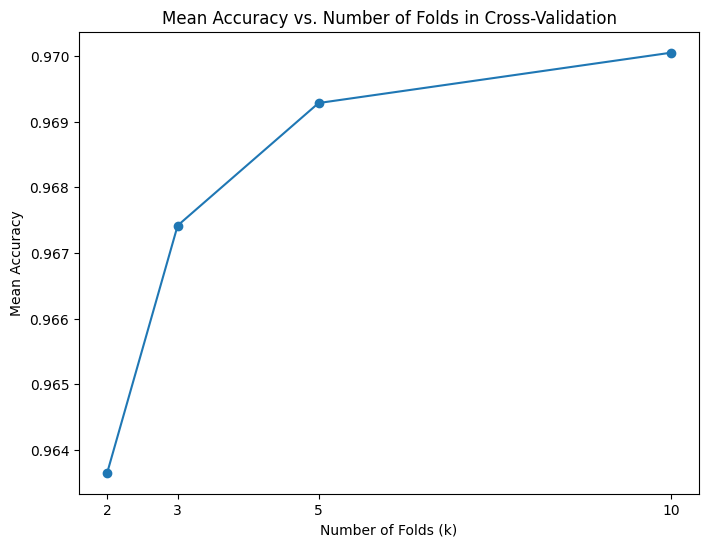

In [ ]:
k_values = [2, 3, 5, 10]
mean_accuracies =[0.96365,0.9674166666666667,0.9692833333333335,0.9700499999999999]
plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_accuracies,marker="o")
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. Number of Folds in Cross-Validation')
plt.xticks(k_values)
plt.show()

(6) Identify the best K value (here we use elbow knn)

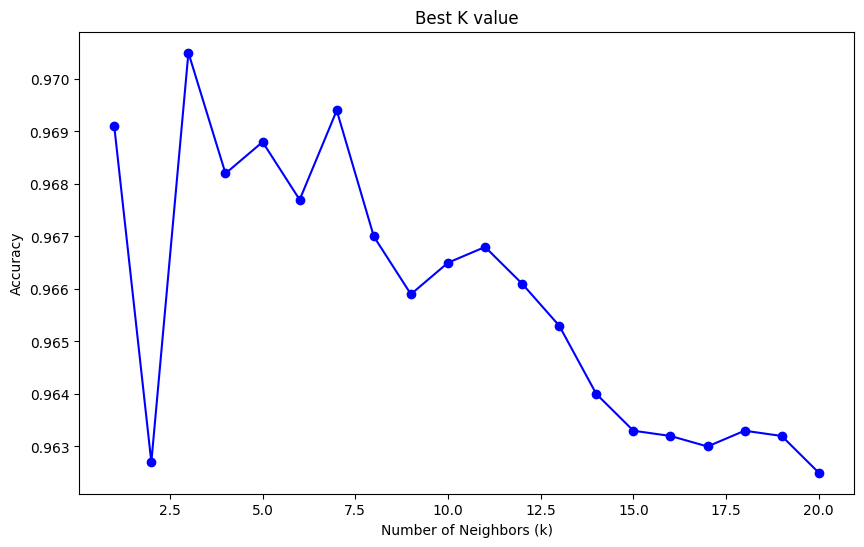

In [ ]:
k_values = range(1, 21)
accuracy_scores = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    accuracy = knn_classifier.score(X_test, y_test)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Best K value')
plt.show()

According to graph best K should be 3 , although any k would give similar / nearby values the best to pick would be 3 to reduce computational time here

(7) Compare values with and without the class imbalance checking

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

After Applying Smote we further balance the data set

In [ ]:
X_train_resampled

In [ ]:
X_test_resampled

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
CV_2_Balanced = cross_val_score(KNN, X_train_resampled, y_train_resampled, cv=2, scoring='accuracy').mean()
CV_2_Balanced

0.9683180065262533

In [ ]:
CV_3_Balanced = cross_val_score(KNN, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy').mean()
CV_3_Balanced

0.9715366626201232

In [ ]:
CV_5_Balanced = cross_val_score(KNN, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy').mean()
CV_5_Balanced


0.9739394838326906

In [ ]:
CV_10_Balanced = cross_val_score(KNN, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy').mean()
CV_10_Balanced

0.9752299021061999

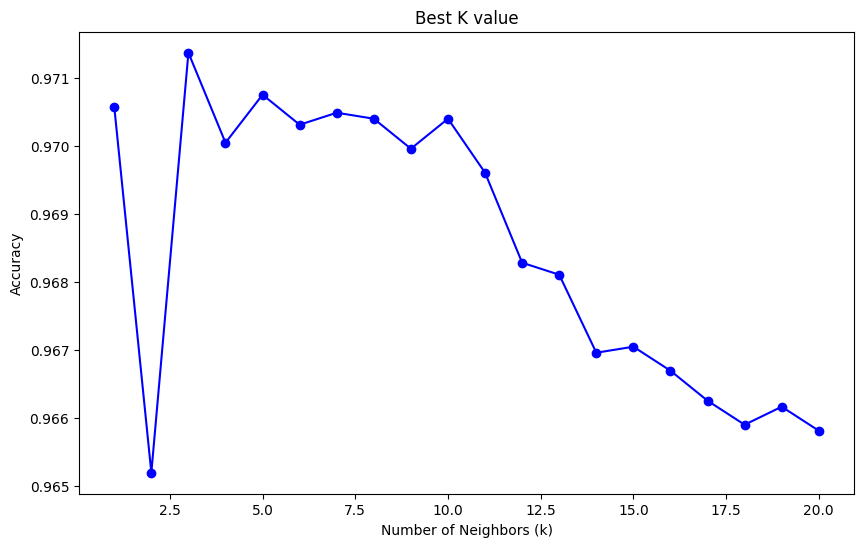

In [ ]:
k_values = range(1, 21)
accuracy_scores = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_resampled, y_train_resampled)
    accuracy = knn_classifier.score(X_test_resampled, y_test_resampled)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Best K value')
plt.show()

The difference between Imbalanced data set and Balanced data set is very minute , it being around 0.004 for cross validation 2 folds suggests that we can carry out operations here without balancing as the accuracy increases is almost negligible .